# Problem 1 - Traveling Salesperson

In [3]:
import mlrose
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

##OPTION 1, Coordinates
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3),(11, 11), (14, 12), (15, 12), (16, 14), (14, 14), (13, 16), (11, 15), (12, 13)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

#Define optimization problem object
problem_fit_coord = mlrose.TSPOpt(length = len(coords_list), coords = coords_list, maximize=False)
print(len(coords_list))

16


# Genetic

In [4]:
# define the parameter values that should be searched
pop_size=200
mutation_prob= 0.4


best_state, best_fitness, genetic_fitness_curve = mlrose.genetic_alg(problem_fit_coord, mutation_prob = mutation_prob, pop_size=pop_size,
                                              max_attempts = 1000, random_state = 3, curve=True)
print("Mutation = ", mutation_prob)
print(best_state)
print(best_fitness)


Mutation =  0.4
[ 2  7  0  1  4  5  6 14 11 12 13 15  9 10  8  3]
59.8698268754879


# Random Hill

In [6]:
# Solve problem using the random hill climb
best_state, best_fitness, random_fitness_curve = mlrose.random_hill_climb(problem_fit_coord,
                                              max_attempts = 1000, random_state = 3, curve=True)

print(best_state)
print(best_fitness)

[ 9  8  7  0  1  2  3  4  6  5 15 14 13 12 11 10]
54.58265765278733


# Simulated Annealing

In [7]:
# Solve problem using simulated annealing

# Define decay schedule
schedule = mlrose.ArithDecay()
best_state, best_fitness, annealing_fitness_curve = mlrose.simulated_annealing(problem_fit_coord, schedule=schedule,
                                              max_attempts = 1000, random_state = 3, curve=True)

print("Simulated annealing with ArithDecay")
print(best_state)
print(best_fitness)



Simulated annealing with ArithDecay
[ 5  6  7  0  1  2  4  3  8 15  9 10 11 12 13 14]
49.930809303501405


# MIMIC

In [8]:
# Solve problem using mimic
pop_size=200 #(300 was 71 and 100 was 74)
max_attempts=100
################
keep_pct=0.4 

best_state, best_fitness, mimic_fitness_curve = mlrose.mimic(problem_fit_coord, pop_size=pop_size, keep_pct=keep_pct,
                                              max_attempts = max_attempts, random_state = 3, curve=True)
print("MIMIC with Keep_PCT of ", keep_pct)
print(best_state)
print(best_fitness)

MIMIC with Keep_PCT of  0.4
[11 13  9  8 14  3  4  2  1  0  7  5  6 15 10 12]
64.00655593408435


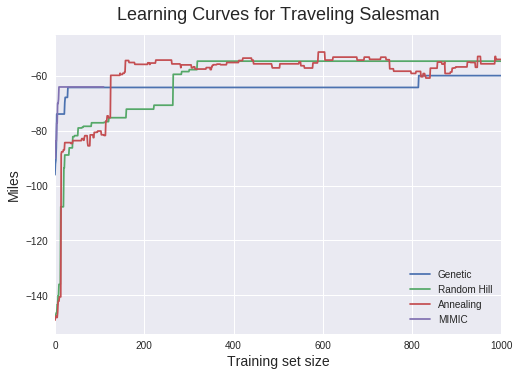

In [20]:
plt.style.use('seaborn')
plt.plot(genetic_fitness_curve, label='Genetic')
plt.plot(random_fitness_curve, label='Random Hill')
plt.plot(annealing_fitness_curve, label='Annealing')
plt.plot(mimic_fitness_curve, label='MIMIC')

plt.xlim(0,1000)

plt.ylabel('Miles', fontsize=14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for Traveling Salesman', fontsize=18, y=1.03)
plt.legend()